**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os

**Get the Data**

In [2]:
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics'
dir_data = base_dir + '\\Data'
dir_plot = base_dir + '\\Paper and Oral'

In [3]:
os.chdir(dir_data)

In [4]:
# load in the spreadsheet with the count-rate maximizing voltage
df = pd.read_excel('count_rate_maximizing_voltages.xlsx')

bs = df['Magnetic Field (G)']
berrs = df['B Uncertainty']
vs = df['Voltage (kV)']
verrs = df['V Uncertainty']

**Plot the Data and Find Linear Relationship**

In [5]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

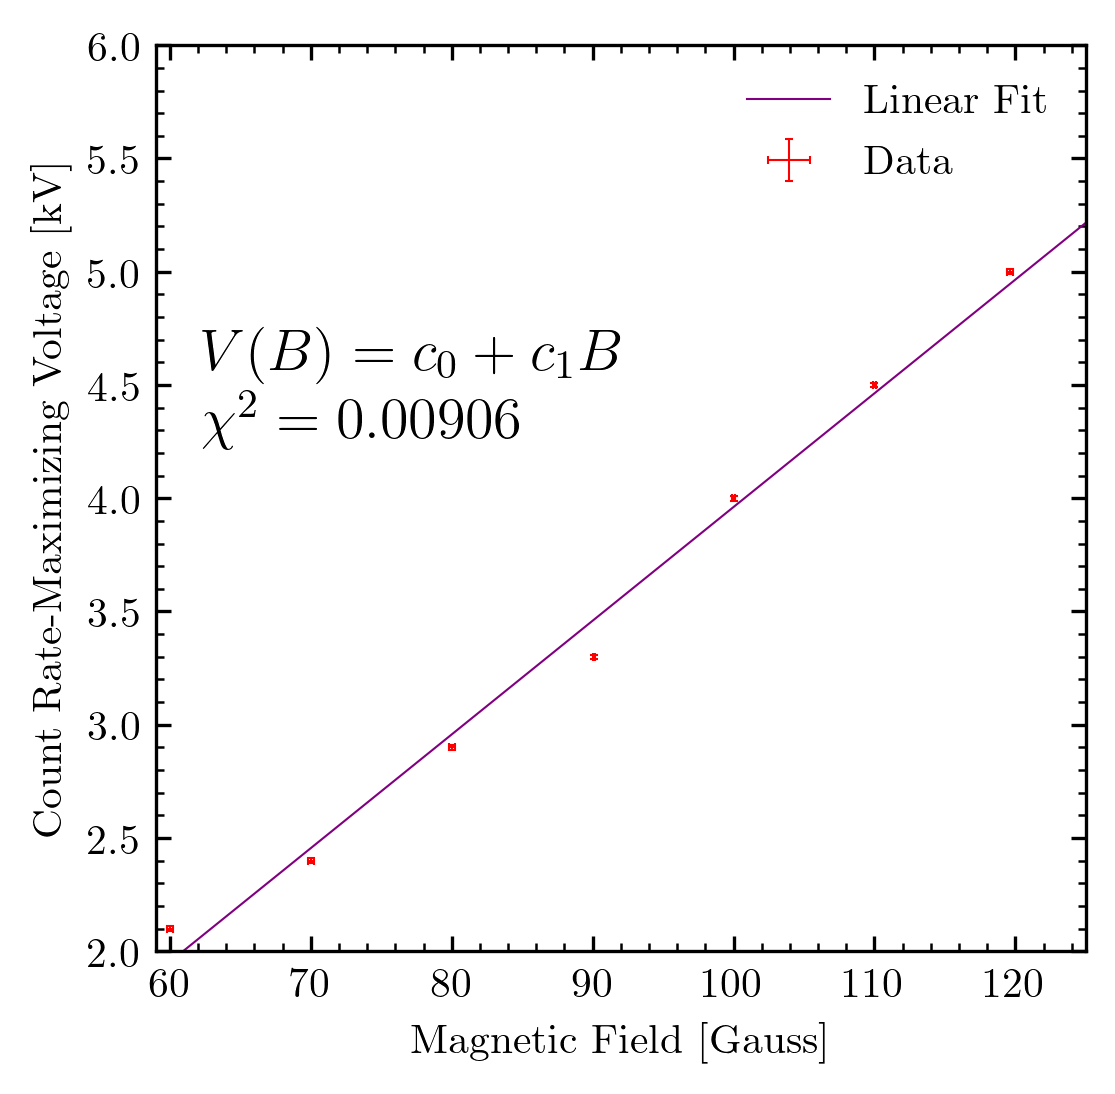

In [24]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(59,125), ylim=(2,6), 
                         xlabel='Magnetic Field [Gauss]', 
                         ylabel='Count Rate-Maximizing Voltage [kV]')

# data
ax.errorbar(bs, vs, xerr=berrs, yerr=verrs, label='Data', color='red', capthick=0.5,
           elinewidth=0.5, capsize=1, ls='none')

# the linear fit
def y(x):
    y = 0.0502*x-1.0588
    return y
x = np.linspace(60,150,100)
ax.plot(x, y(x), lw=0.5, color='purple', label='Linear Fit')

ax.legend(loc='upper right', numpoints=1, frameon=False)

modplot.stamp(0.05, 0.65, ax=ax, delta_y=0.065, textops_update={'fontsize':14},
         line_0='$V(B)=c_{0}+c_{1}B$',
         line_1='$\chi^{2}=0.00906$')

save = True
if save:
    plt.savefig(dir_plot + '\\count_rate_max.png')

In [7]:
# chi-square
def chisq(x, y, data):
    return np.sum((data-y(x))**2/y(x)**2)

chi2 = chisq(bs, y, vs)

In [8]:
chi2

0.009062733917719924

In [9]:
vs

0    4.0
1    4.5
2    5.0
3    3.3
4    2.9
5    2.4
6    2.1
Name: Voltage (kV), dtype: float64

In [10]:
y(bs)

0    3.96120
1    4.46320
2    4.94512
3    3.46422
4    2.95720
5    2.45520
6    1.95320
Name: Magnetic Field (G), dtype: float64

In [11]:
vs-y(bs)

0    0.03880
1    0.03680
2    0.05488
3   -0.16422
4   -0.05720
5   -0.05520
6    0.14680
dtype: float64

In [12]:
(vs-y(bs))**2

0    0.001505
1    0.001354
2    0.003012
3    0.026968
4    0.003272
5    0.003047
6    0.021550
dtype: float64